

---

# **Membrane Dynamics**

---

#### *Learning outcomes*

1. Implement a simple model for a neuron's membrane potential dynamics in python
2. Understand the properties of passive and active membrane potential dynamics, including:
i) How the membrane time constant and external input determine the transient and steady-state responses of the membrane potential
ii) How specific ionic conductances and reversal potentials influence the membrane potential iii) How active membrane dynamics contribute to the action potential
3. Apply and compare numerical and analytical approaches to understanding the behaviour of neuron models

# Introduction

Neurons are the fundamental processing units in the brain and they transmit signals in the form of short electrical pulses called action potentials (or spikes) that can be measured across the cell membrane. The membrane voltage of a neuron changes in time due to the flow of ions into or out of the cell, and this is governed by certain mechanisms. If this voltage reaches a threshold, then an action potential is generated and transmitted to other neurons. A great deal is known about the biophysical mechanisms that drive this neuronal activity, and this provides a basis for developing models that describe the dynamics of the membrane potential, ranging from simplified descriptions to highly detailed systems that account for more fine-grained variations in space and time.

</br>
</br>

<p align="center" width="100%">
<img src="https://drive.google.com/uc?id=115dpQEQ6qDvbW3lsDx5_p7t7BCJ1InWY"
width="1000px;">
</p>

*Figure 1: **A** Structure of a neuron with schematic of the action potential. Generally speaking, the dendrites collect signals from other neurons and transmit them to the soma, which is the central processing unit of the cell. If the total input arriving at the soma exceeds a certain threshold, then an output signal is generated, which then travels along the axon and is delivered to other neurons. This is the fundamental form of communication between neurons. **B** Membrane potential dynamics of a single neuron. The voltage fluctuates due to the flow of ions across the membrane and the spike is generated if this voltage reaches a certain threshold.*

</br>

In this lab, we will look at two simple models of the dynamics of the membrane potential which describe how the voltage evolves in response to changes in the external input (e.g. currents injected from other neurons) or to changes in the properties of the cell (e.g. time-dependent conductances). The material of this lab was mostly covered in lecture 3.

In the absence of inputs, a certain voltage (the 'resting potential') is maintained across the membrane at which no net current will flow. The model of *passive membrane dynamics* describes how the potential varies if an external input is provided to the cell. Understanding this process is critical to understanding how neurons compute, given that neurons communicate by injecting current into each other via synapses.

The passive model approximates all conductances in the membrane, which are related to how permeable the membrane is to ions, to be constant in time. However, this is not always a reasonable approximation and this model fails to capture some important properties, including how action potentials are generated. In fact, permeability of ion channels can be time- or voltage-dependent: as the membrane potential changes in time, so do the properties of the cell that contribute to its dynamics. The model for *active membrane dynamics* takes this into consideration and it describes how the membrane potential evolves in time when the conductances also vary. We will see how, contrary to the passive model, accounting for these variations in conductances can explain the mechanisms of generating action potentials.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

# global defaults for all plots - optional
sns.set_theme(style="ticks",
              palette="Set1",
              font_scale=1,
              rc={
              "axes.spines.right": False,
              "axes.spines.top": False,
          },
          )

# Setting up the Model for Passive Membrane Dynamics

We first consider how to numerically simulate the passive membrane potential dynamics of a neuron. As discussed in lecture 3, the passive membrane potential dynamics are governed by the following differential equation

\begin{equation}
\tau \frac{dV}{dt} = -(V-E_m) + \frac{I_{ext}}{g_m} \hspace{1cm} (1)
\end{equation}

where $V$ is the membrane potential, $E_m$ is the membrane resting potential, $\tau$ is the membrane time constant, $g_m$ is the membrane conductance and $I_{ext}$ is the external input current.

## Exercise 1.1 - Find $V(t)$ with Euler Method

As we saw in Lab 0, this equation describes the evolution in time of our variable of interest $V$. Write a short script to solve equation 1 numerically using the Euler method and plot the solution over time $V(t)$. To do this, you will need to first assign values to the parameters of the equation ($\tau,E_m,I_{ext}, g_m$) and to the parameters of the Euler integration (the number of iterations $N_t$, and the timestep $\delta t$). You should also create an array of size $\left[N_t+1, 1\right]$ to store the values of the membrane potential $V$ in time (note that after $N_t$ iterations you will have $N_t+1$ time points). You will then need a `for` loop to fill in the entries of this array.

Choose $N_t$ = 10000 and $\delta t = 0.1 ms$, giving a total simulation time of 1s. Run a simulation from the initial condition $V(0)=E_m$, with model parameters $\tau = 10 ms$, $E_m = -70 mV$, $g_m = 1$, and $I_{ext} = 20$ (note that this value of $g_m$ is not biologically realistic if measured in Siemens, but can be viewed as a convenient change of units such that $I_{ext}$ now has units of $mV$).

- Check that your simulation runs without returning any errors and, if so, plot the membrane potential as a function of time. Inspect the plot: did the simulation run as expected? How can you tell?

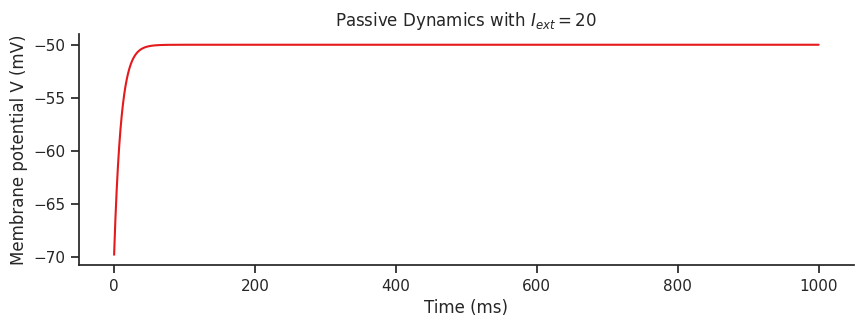

In [30]:
def simulate_passive(N_t, dt,  V_init, E_m, I_ext, g_m, tau):
    # V = ...
    V = np.zeros([N_t+1, 1])
    V[0] = V_init
    for i in range(1, N_t+1):
      dV = (-(V[i-1] - E_m) + (I_ext/g_m))
      V[i] = V[i-1] + dt *  dV / tau
    return V

#parameters

#for Euler method
N_t = 10000
dt = 0.1

#for model
V_init = -70
E_m = -70
tau = 10
g_m = 1
I_ext = 20

first_run = simulate_passive(N_t, dt, V_init, E_m, I_ext, g_m, tau)
fig, ax = plt.subplots(1,1, figsize = (10,3))
ax.plot(np.arange(0,N_t*dt, dt), first_run[1:])
ax.set_title('Passive Dynamics with $I_{ext} = 20$')
ax.set_xlabel('Time (ms)')
ax.set_ylabel('Membrane potential V (mV)')
plt.show()


## Exercise 1.2 - Explore solutions for different $I_{ext}$, $\tau$, $V(0)$

Now that we have a numerical solver for the equation, we can explore how the parameters of the model affect the solution and whether they lead to different dynamics.
Try varying (separately) the input current, time constant, and initial condition$^1$. In particular, simulate $V(t)$ for the same default parameters as in Exercise 1.1 but changing in turn the values of $I_{ext}$, $\tau$ or $V(0)$ within these intervals (or feel free to play around with them):
* $I_{ext} \in [-40,40]$
* $\tau \in [1,100]$
*  $V(0) \in [-80,-40]$

How does each parameter affect the membrane potential $V(t)$?

$^1$ It may help if you modify the code to allow you to simulate the model under multiple parameter values in one go. One way to do this is to write a `for` loop around your simulation that iterates over parameters (although `for` loops are inefficient in Python and Matlab - if you convert the set of equations into a vector equation it will run faster). You can create a membrane potential array of size $\left[N_t+1, N_{parameters}\right]$ and store all the simulations in this array.

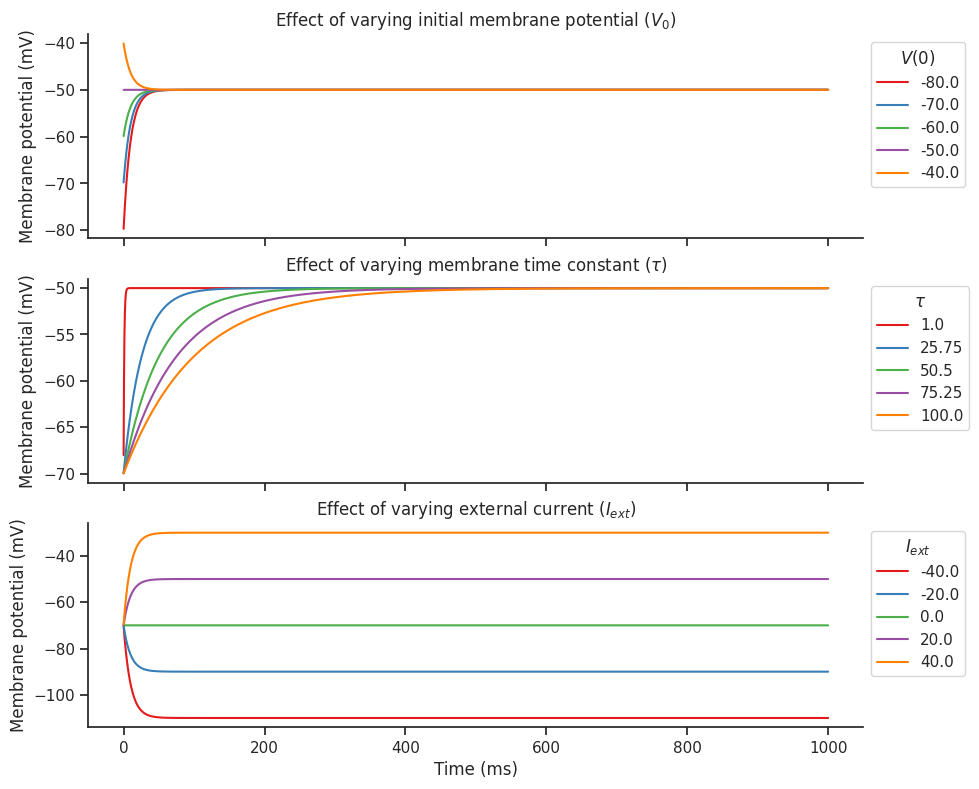

In [33]:
# same solver in vectorised form

def simulate_passive_vectorized(N_t, dt,  V_init, E_m, I_ext, g_m, tau):
    #I_ext is a vector
    #V_init is a vector
    #tau is a vector

    ### your solution here ###
    V = np.zeros([N_t+1, len(V_init)])
    V[0] = V_init
    for i in range(1, N_t+1):
      dV = -(V[i-1] - E_m) + (I_ext / g_m)
      V[i] = V[i-1] + dV * dt / tau
    return V


## varying I_ext, tau, V_init
N_t = 10000
n_params = 3
values = 5
combs = n_params * values

V_inits = np.zeros([combs]) - 70     # the default value for V_inits is -70
V_inits[:values] = np.linspace(-80,-40,values)
taus = np.zeros([combs]) + 10
taus[values:2*values] = np.linspace(1,100, values)
I_exts = np.zeros([combs]) + 20
I_exts[2*values:] = np.linspace(-40,40,5)

V_var = simulate_passive_vectorized(N_t, dt, V_inits, E_m, I_exts, g_m, taus)

fig, ax =  plt.subplots(3,1, sharex = True, figsize=(10,9))
for i in range(values):
    ax[0].plot(np.arange(0,N_t*dt, dt), V_var[1:,i], label = V_inits[i])
    ax[1].plot(np.arange(0,N_t*dt, dt), V_var[1:,values+i], label = taus[values+i])
    ax[2].plot(np.arange(0,N_t*dt, dt), V_var[1:,2*values+i], label = I_exts[2*values+i])
ax[0].set_title('Effect of varying initial membrane potential ($V_0$)')
ax[1].set_title('Effect of varying membrane time constant ($\\tau$)')
ax[2].set_title('Effect of varying external current ($I_{ext}$)')
ax[2].set_xlabel('Time (ms)')
ax[0].set_ylabel('Membrane potential (mV)')
ax[1].set_ylabel('Membrane potential (mV)')
ax[2].set_ylabel('Membrane potential (mV)')
ax[0].legend(bbox_to_anchor=(1., 1.0), loc='upper left', title='$V(0)$')
ax[1].legend(bbox_to_anchor=(1., 1.0), loc='upper left', title='$\\tau$')
ax[2].legend(bbox_to_anchor=(1., 1.0), loc='upper left', title='$I_{ext}$')
plt.show()

**Analytical solution**

For equation 1 we can find the analytical solution with the method of integrating factors (derived in Lab0) and compare it to the numerical solutions plotted above. Recall the solution from Lab0:

\begin{aligned}
\begin{cases}
      \frac{dx}{dt} = ax + b(t)\\
      x(0) = x_0
    \end{cases}
\implies x(t) &= e^{at} x_0 + \int_0^t e^{a(t-t')} b(t') dt'
\end{aligned}

Convert the ODE into equation (1) for the membrane potential by setting the appropriate values to $x$, $a$ and $b(t)$. Then insert these expressions into the solution to the general ODE to get the solution for $V(t)$ -- *note that some manipulations are necessary to make the equation more interpretable*.



## Exercise 1.3 - Steady State

The previous exercises showed that for a constant current input $I_{ext}$, the passive membrane dynamics will settle into a constant membrane potential. This is called the *steady-state* membrane potential and its value, as seen in the previous simulations, may depend on the parameters of the model. Here, we want to explore this dependency more systematically.

The steady state can be found numerically by simulating for long enough that $V$ is approximately constant over consecutive time steps.

* For various parameter choices of $I_{ext}$, $\tau$, $V(0)$, find the **numerical** solution of the steady-state membrane potential $V_{\infty}$ (make sure to check that the neuron has approximately reached steady state by the end of your simulation).

In [ ]:
V_inf = simulate_passive_vectorized(100000, dt, V_inits, E_m, I_exts, g_m, taus)

Given the equation for the membrane dynamics, we can also find the solution of the steady state analytically. By definition, steady state $V_{\infty}$ is reached if the derivative with respect to time is 0, $\frac{dV}{dt} = 0$, so that $V$ does not change in time.

* Find the **analytical** equation for the steady state $V_{\infty}$ by setting $\frac{dV}{dt} = 0$ in the passive membrane potential equation (1).

How does the steady-state membrane potential vary with different parameters? Do the simulations match with the analytical solution?

# Active Membrane Dynamics

The passive membrane potential dynamics in equation (1) are a special case of the more general equation:

\begin{equation}
C_m \frac{dV(t)}{dt} = -g_L[V(t)-E_L] - g_K(V,t) [V(t)-E_K] - g_{Na}(V,t) [V(t)-E_{Na}] +I_{ext} \hspace{1cm} (2)
\end{equation}

where $C_m$ is the membrane capacitance, $g$ are membrane conductances (leak, potassium, and sodium) and $E$ are the reversal potentials (leak, potassium, and sodium). Equation (1) assumes that these conductances are constant, but in fact they can be voltage- and time-dependent (called active membrane dynamics). Here we will see how variations of $g$ affect the dynamics of $V(t)$.

## Exercise 2.1 - Steady state

First, we explore numerically how the steady state of equation (2) depends on the parameters of the model, as in the previous exercise. In particular, we want to see how $V_\infty$ is affected by the individual reversal potentials and conductances.

Start with the parameter configuration $I_{ext}=0$, $C_m=12$, $g_L=1$, $g_K=0.2$, $g_{Na}=0$, $E_L=-70$ mV, $E_K=-80$ mV, $E_{Na}=50$ mV, $dt=0.1$ ms, simulate $V(t)$ from equation (2) for 500 time steps (50 ms) and plot the solution. Then vary in turn the values of reversal potentials and conductances, repeat the simulation and plot $V(t)$.

* How does the steady state voltage change if you vary the individual reversal potentials and/or conductances?

* How long does it take to reach steady state? Does this depend on the conductances and/or the reversal potentials?

*Note that we are still in the case of constant conductances*


In [73]:
def simulate_active_vectorized(N_t, dt, V_init, g_L, E_L, g_K, E_K, g_Na, E_Na, I_ext, C_m):
  # print(I_ext)
  V = np.zeros([N_t+1, len(V_init)])
  V[0] = V_init
  for i in range(1, N_t+1):
    dV = -g_L * (V[i-1] - E_L) - g_K * (V[i-1] - E_K) - g_Na * (V[i-1] - E_Na) + I_ext
    V[i] = V[i-1] + dV * dt / C_m
  return V

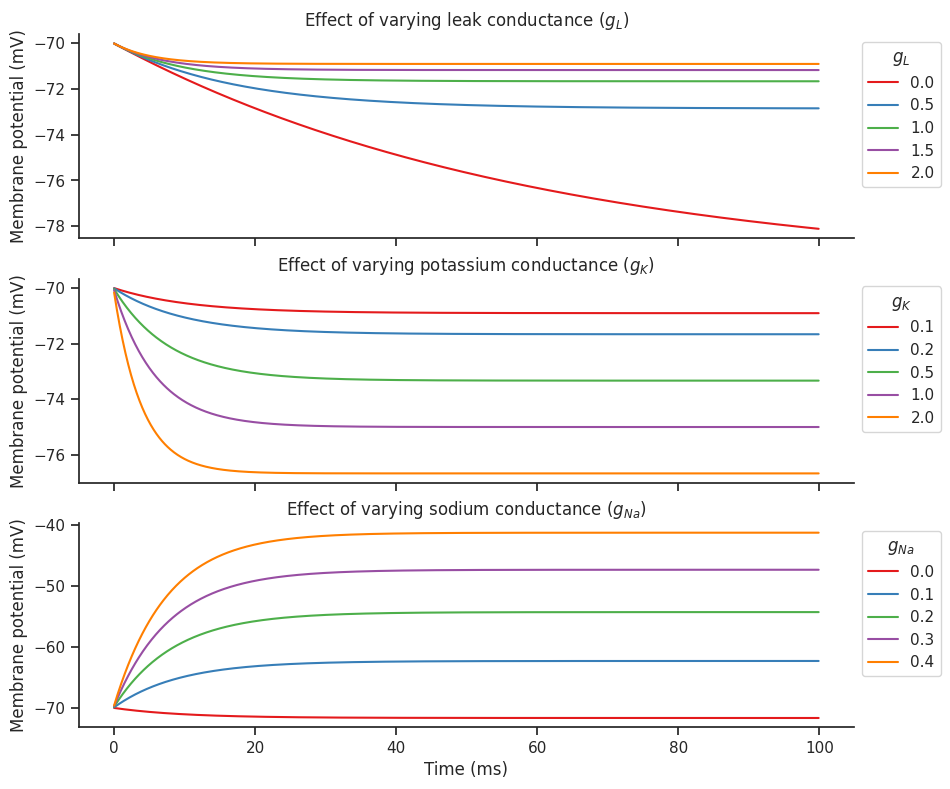

In [74]:
## varying conductances

# default parameters
I_ext = 0
C_m = 12
dt = 0.1
N_t = 1000
E_L = -70
E_K = -80
E_Na = 50

n_params = 3
values = 5
combs = n_params * values

V_inits = np.zeros([combs]) - 70
g_L = np.zeros([combs]) + 1
g_L[:values] = [0, 0.5, 1, 1.5, 2]  ### set the range of values you want to explore
g_K = np.zeros([combs]) + 0.2
g_K[values:2*values] = [0.1, 0.2, 0.5, 1, 2]  ### set the range of values you want to explore
g_Na = np.zeros([combs])
g_Na[2*values:] = [0, .1, .2, .3, .4] ### set the range of values you want to explore

V_var = simulate_active_vectorized(N_t, dt, V_inits, g_L, E_L, g_K, E_K, g_Na, E_Na, I_ext, C_m)

fig, ax =  plt.subplots(3,1, sharex = True, figsize=(10,9))
for i in range(values):
    ax[0].plot(np.arange(0,N_t*dt, dt), V_var[1:,i], label = g_L[i])
    ax[1].plot(np.arange(0,N_t*dt, dt), V_var[1:,values+i], label = g_K[values+i])
    ax[2].plot(np.arange(0,N_t*dt, dt), V_var[1:,2*values+i], label = g_Na[2*values+i])
ax[0].set_title('Effect of varying leak conductance ($g_L$)')
ax[1].set_title('Effect of varying potassium conductance ($g_K$)')
ax[2].set_title('Effect of varying sodium conductance ($g_{Na}$)')
ax[2].set_xlabel('Time (ms)')
ax[0].set_ylabel('Membrane potential (mV)')
ax[1].set_ylabel('Membrane potential (mV)')
ax[2].set_ylabel('Membrane potential (mV)')
ax[0].legend(bbox_to_anchor=(1., 1.0), loc='upper left', title='$g_L$')
ax[1].legend(bbox_to_anchor=(1., 1.0), loc='upper left', title='$g_K$')
ax[2].legend(bbox_to_anchor=(1., 1.0), loc='upper left', title='$g_{Na}$')
plt.show()

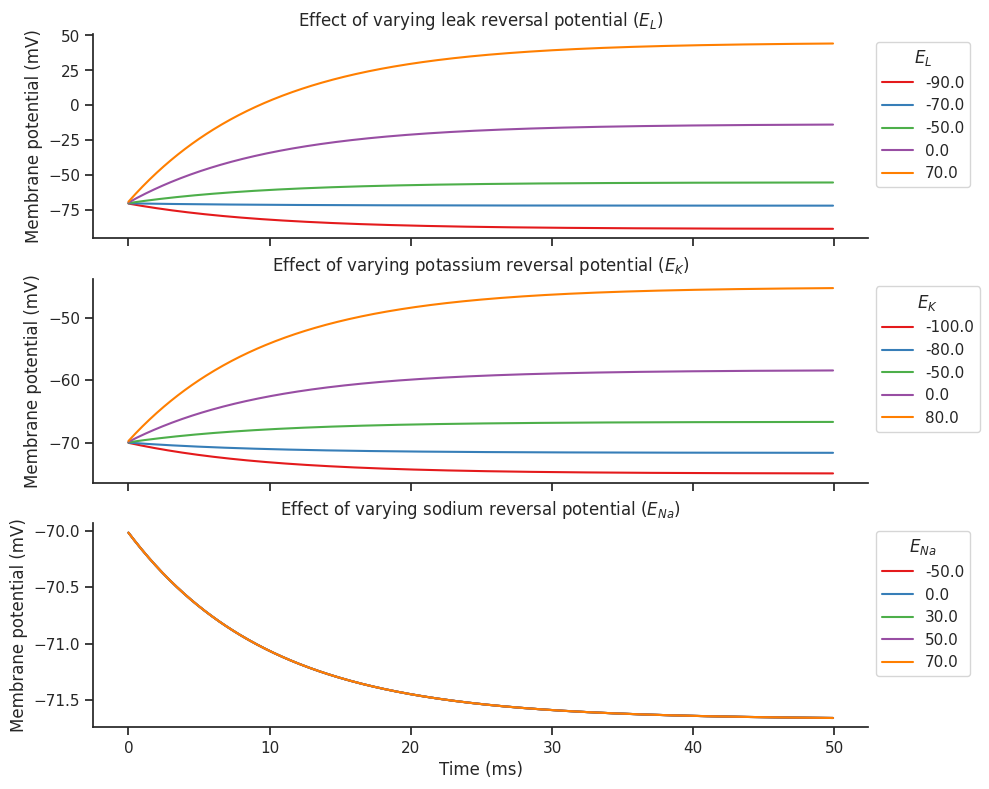

In [75]:
## varying reversal potentials

# default parameters
I_ext = 0
C_m = 12
dt = 0.1
N_t = 500
g_L = 1
g_K = 0.2
g_Na = 0

n_params = 3
values = 5
combs = n_params * values

V_inits = np.zeros([combs]) - 70
E_L = np.zeros([combs]) - 70
E_L[:values] = [-90, -70, -50, 0, 70]  ### set the range of values you want to explore
E_K = np.zeros([combs]) - 80
E_K[values:2*values] = [-100, -80, -50, 0, 80]  ### set the range of values you want to explore
E_Na = np.zeros([combs]) + 50
E_Na[2*values:] = [-50, 0, 30, 50, 70]  ### set the range of values you want to explore

V_var = simulate_active_vectorized(N_t, dt, V_inits, g_L, E_L, g_K, E_K, g_Na, E_Na, I_ext, C_m)

fig, ax =  plt.subplots(3,1, sharex = True, figsize=(10,9))
for i in range(values):
    ax[0].plot(np.arange(0,N_t*dt, dt), V_var[1:,i], label = E_L[i])
    ax[1].plot(np.arange(0,N_t*dt, dt), V_var[1:,values+i], label = E_K[values+i])
    ax[2].plot(np.arange(0,N_t*dt, dt), V_var[1:,2*values+i], label = E_Na[2*values+i])
ax[0].set_title('Effect of varying leak reversal potential ($E_L$)')
ax[1].set_title('Effect of varying potassium reversal potential ($E_K$)')
ax[2].set_title('Effect of varying sodium reversal potential ($E_{Na}$)')
ax[2].set_xlabel('Time (ms)')
ax[0].set_ylabel('Membrane potential (mV)')
ax[1].set_ylabel('Membrane potential (mV)')
ax[2].set_ylabel('Membrane potential (mV)')
ax[0].legend(bbox_to_anchor=(1., 1.0), loc='upper left', title='$E_L$')
ax[1].legend(bbox_to_anchor=(1., 1.0), loc='upper left', title='$E_K$')
ax[2].legend(bbox_to_anchor=(1., 1.0), loc='upper left', title='$E_{Na}$')
plt.show()


Since we are still in the regime where $g_K$, $g_{Na}$ do not depend on $t$ or $V$, we can compute the analytical solution of the steady state of equation (2) in the same way as Exercise 1.3.
* Find the equation for $V_∞$ and check whether the dependencies on the parameters match with the simulations.

## Exercise 2.2 - Conductance Clamp

We now consider the case where conductances are time-dependent {$g_K(t)$, $g_{Na}(t)$}. To gain intuition into how changes in conductance can influence the membrane potential dynamics, we perform an experiment where we control the conductances of a neuron by hand (i.e., a "conductance clamp"). What happens if you suddenly increase $g_{Na}$ to a large value after the voltage has reached steady state?

To test this, repeat the above experiment with the default parameter settings and these variations:
1. set $g_{Na} = 0$ for $t<25$ ms and $g_{Na} = 100$ for $t> 25$ ms and plot the voltage $V(t)$
2. set $g_{Na}=100$ for $25 < t < 26 ms$ and $g_{K} = 100$ for $26 < t < 27$ ms (keeping them at their baseline values otherwise) and plot the voltage $V(t)$

What happens? Why does this parameter setting generate this profile of $V(t)$?

[-70.]


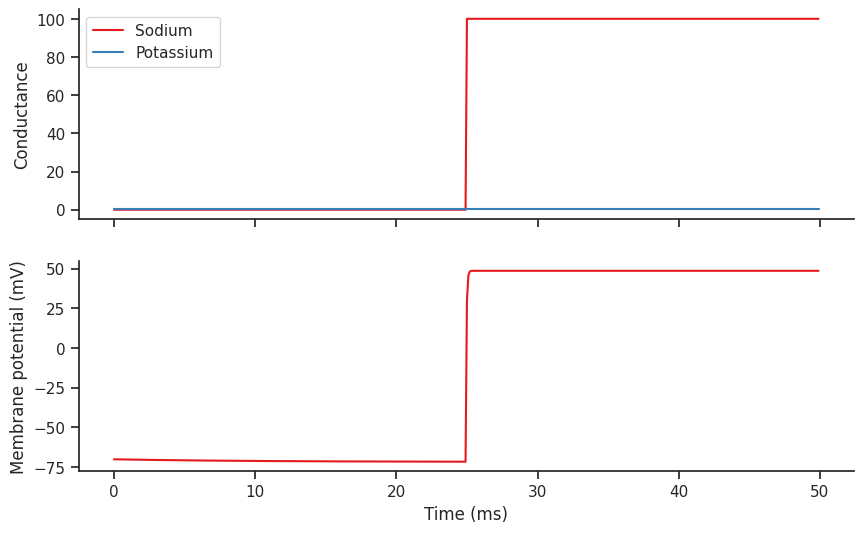

In [76]:
def simulate_conductance_clamp(N_t, dt, V_init, g_L, E_L, g_K, E_K, g_Na, E_Na, I_ext, C_m):
    # g_K is a vector of length N_t
    # g_Na is a vector of length N_t
    ### your solution here ###
    V = np.zeros([N_t+1, len(V_init)], dtype=np.float64)
    V[0] = V_init
    print(V[0])
    for i in range(1, N_t+1):
      dV = -g_L[i-1] * (V[i-1] - E_L) - g_K[i-1] * (V[i-1] - E_K) - g_Na[i-1] * (V[i-1] - E_Na) + I_ext
      V[i] = V[i-1] + dV * dt / C_m
    return V

I_ext = 0
C_m = 12
N_t = 500
dt = 0.1
V_init = np.array([-70])

E_L = -70
E_K = -80
E_Na = 50

### your solution here ###
g_L = np.zeros([N_t]) + 1
g_K = np.zeros([N_t]) + 0.2
g_Na = np.zeros([N_t]) + 0
# EXP 1
g_Na[:250] = 0
g_Na[250:] = 100
# EXP 2
# g_Na[250:260] = 100
# g_K[260:270] = 100


V_cc = simulate_conductance_clamp(N_t, dt, V_init, g_L, E_L, g_K, E_K, g_Na, E_Na, I_ext, C_m)
fig, ax =  plt.subplots(2,1, sharex = True, figsize=(10,6))
ax[0].plot(np.arange(0,N_t*dt, dt), g_Na, label='Sodium')
ax[0].plot(np.arange(0,N_t*dt, dt), g_K, label='Potassium')
ax[0].set_ylabel('Conductance')
ax[0].legend()
ax[1].plot(np.arange(0,N_t*dt, dt), V_cc[1:])
ax[1].set_xlabel('Time (ms)')
ax[1].set_ylabel('Membrane potential (mV)')
plt.show()


This model shows much richer dynamics of the membrane potential, with variations on faster timescales compared to the passive dynamics and a profile that resembles the shape of an action potential. In fact, this is the basis of the Hodgkin-Huxley model, which very successfully describes how action potentials are generated via an interplay of the sodium and potassium channels, as you will see in lecture 4.

# Bonus Section: Derivation of the Nernst Equation (Optional)

In this section, we will carry out a simple derivation of the Nernst equation introduced in Lecture 3, starting from basic physical principles. This is not the only derivation of the Nernst equation, nor the most direct, but it is perhaps the simplest. The derivation invokes two principles that you may not be familiar with - first, the Boltzmann distribution from statistical physics (later adopted in machine learning), second, the energy required to move a charge along a voltage difference.

Consider a particle (e.g., an ion) of charge $q$ that can be in one of two states (e.g., inside or outside of a neuron). Assume that there is a voltage $V$ separating the two states - electrostatic theory tells us that takes $\Delta E=E_{out}-E_{in} = qV$ Joules of energy to move the particle against this voltage (i.e. to move an ion from inside to outside the neuron). The Boltzmann distribution tells us that, at thermal equilibrium, the probability that a closed system will be in state $i$ with energy $E_i$ is $p(E_i) \propto e^{-E_i/kT}$, where $T$ is the temperature of the system. We will assume that we have a closed system at thermal equilibrium, but this is of course not really the case in the brain. To derive the Nernst equation:

* Consider a system formed of just one ion, which can be either inside or outside a neuron, subject to the aforementioned voltage difference. Write down an expression for $p(E_{out})/p(E_{in})$, the ratio of the probability of the ion being outside vs inside the cell.
* Now assume that we have a system of many such ions, that they are all independent of each other, and each subject to the same voltage $V$. What is the ratio of their concentration outside vs inside $[out]/[in]$? (Hint: this is trivial given the result of the above question)
* Given this result, what voltage $V$ is required to maintain a given concentration ratio $[out]/[in]$, at a given temperature $T$?
* Compare your result to the Nernst equation given in lecture 3. Can you make the two equations equal? How does the Boltzmann factor $k$ relate to the two constants $R$ and $F$?

**Answer**:

1) $p(E_{out})/p(E_{in}) = e^{-\Delta E/ kT} = e^{-qV/kT} $

2) $p(E_{out})/p(E_{in}) = [out]/[in] = e^{-qV/kT}$. Note that this requires that we assume the ions are independent/non-interacting, otherwise the energy of the full system of ions would depend on the state of every ion relative to the others.

3) $V = -\frac{kT}{q} \log \frac{[out]}{[in]}$

4) $q=ze$, where $e$ is the charge of an electron (or rather, the charge of a proton, since $e$ is positive).

If we have indeed derived the Nernst equation from lectures, we must have $\frac{kT}{ze} = \frac{RT}{zF} \implies k=eR/F$. This is indeed the case - physicists usually work with the Boltzmann factor $k$, but chemists prefer to work with the universal gas constant $R$ and Faraday constant $F$, and you will find both forms of the Nernst equation depending on the source. Note that we also have a minus sign - this is because we have measured voltage out $V_{out} - V_{in}$, while biologists measure it as $V_{in}-V_{out}$.